# Equilibirum notes

In [ ]:
using Revise
using FUSE
using Plots;
FUSE.logging(Logging.Info);

### Comparing Solovev equilibirum with CHEASE equilibrium to the original ITER ods equilibrium

In [ ]:
### Solovev init equilibrium
ini, act = FUSE.case_parameters(:ITER, init_from=:ods);
ini.equilibrium.B0 = 5.3
dd = FUSE.init(ini,act)
eq_plot = plot(dd.equilibrium, label="ITER ods equilibrium")

### CHEASE equilibrium
act.ActorEquilibrium.model = :CHEASE
act.ActorCHEASE.free_boundary = false
FUSE.ActorEquilibrium(dd, act)
display(plot!(eq_plot, dd.equilibrium, label="CHEASE equilibrium"))
FUSE.ActorEquilibrium(dd,act)
display(plot!(eq_plot,dd.equilibrium, label="CHEASE equilibrium 3"))
FUSE.ActorEquilibrium(dd,act)
display(plot!(eq_plot,dd.equilibrium, label="CHEASE equilibrium 4"))

In [ ]:
FUSE.digest(dd)

### Finding a MXH parametrization of the boundary for ITER

In [ ]:
import MillerExtendedHarmonic: flat_coeffs
#dd, ini, act = FUSE.init(:ITER, init_from=:ods); start with CHEASE boundary from above
eqt = dd.equilibrium.time_slice[]
eqt_bound = eqt.boundary.outline
psi_close = (eqt.profiles_1d.psi[end] + 5 * eqt.profiles_1d.psi[end]) / 6
r_bound, z_bound = IMAS.flux_surface(eqt, psi_close)

eq_plot = plot(r_bound, z_bound, label="1.0 of original boundary shape")
for order in [4]
    mxh = IMAS.MXH(r_bound, z_bound, order)
    @show round.(flat_coeffs(mxh), digits=5)
    plot!(mxh, label="MXH $order")
end
display(plot!(eqt_bound.r, eqt_bound.z, label="original boundary shape", color="black", marker="x", lw=0, markersize=1))

### Comparing CHEASE deadstart from MXH parametrization vs. Miller parametrization

In [ ]:
ini, act = FUSE.case_parameters(:ITER, init_from=:scalars);
ini

In [ ]:
# Solovev deadstart (default)
dd, ini, act = FUSE.init(:ITER, init_from=:ods);
ods_plot = plot(dd.equilibrium, label="ITER ODS eq")
display(ods_plot)

# CHEASE deadstart MXH
dd = IMAS.dd()
ini, act = FUSE.case_parameters(:ITER, init_from=:scalars);
ini.equilibrium.boundary_from = :MXH_params
act.ActorEquilibrium.model = :CHEASE
dd = FUSE.init(dd, ini, act)
mxh_plot = plot(dd.equilibrium, label="CHEASE deadstart MXH")
display(mxh_plot)

# CHEASE deadstart MILLER
dd = IMAS.dd()
ini, act = FUSE.case_parameters(:ITER, init_from=:scalars);
ini.equilibrium.boundary_from = :scalars
act.ActorEquilibrium.model = :CHEASE
act.ActorCHEASE.free_boundary = false
dd = FUSE.init(dd, ini, act)
miller_plot = plot(dd.equilibrium, label="CHEASE deadstart Miller")
display(miller_plot)

### Make new FPP boundary from scratch

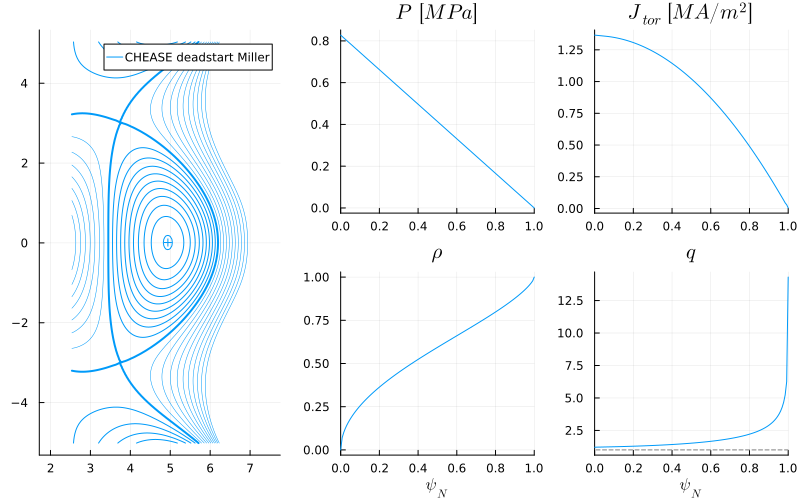

GEOMETRY                       EQUILIBRIUM                    TEMPERATURES                   DENSITIES                      
───────────────────────────    ───────────────────────────    ───────────────────────────    ───────────────────────────    
R0 → 4.82 [m]                  B0 → 4.71 [T]                  Te0 → 18.2 [keV]               ne0 → 1.49e+20 [m⁻³]           
a → 1.38 [m]                   ip → 9.06 [MA]                 Ti0 → 18.2 [keV]               ne_ped → 1.14e+20 [m⁻³]        
1/ϵ → 3.5 [m]                  q95 → 3.69                     <Te> → 7.73 [keV]              <ne> → 1.29e+20 [m⁻³]          
κ → 2.2                        βpol → 1.36                    <Ti> → 7.73 [keV]              ne0/<ne> → 1.16                
δ → 0.708                      βtor → 0.0393                  Te0/<Te> → 2.35                fGW → 0.896                    
ζ → -0.0596                    βn → 2.81                      Ti0/<Ti> → 2.35                zeff_ped → 2                   


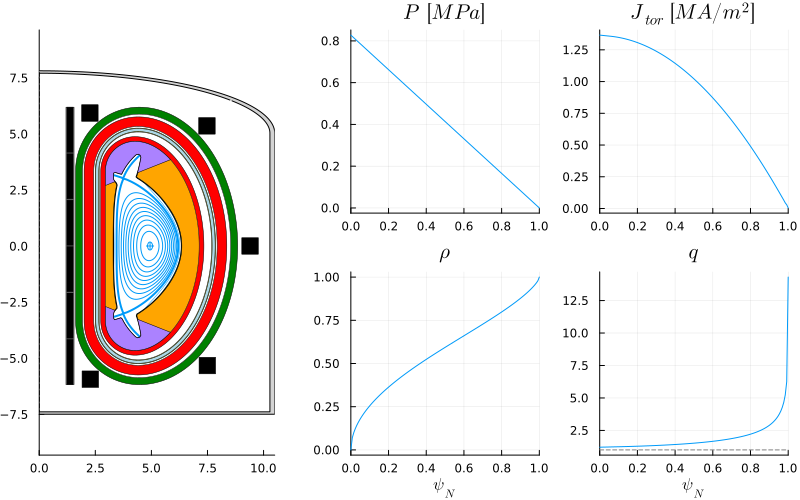

​


28×9 DataFrame
 Row │ group   details               type      ΔR         R_start   R_end     material      area       volume    
     │ String  String                String    Float64    Float64   Float64   String        Float64    Float64   
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                                      1.19256     0.0       1.19256                14.7475      55.252
   2 │ in                            oh        0.359292    1.19256   1.55185  ReBCO          4.44309     38.3076
   3 │ in                                      0.0696459   1.55185   1.6215                  0.861258     8.5862
   4 │ hfs                           tf        0.310717    1.6215    1.93222  ReBCO          9.74379     99.2715
   5 │ hfs                                     0.0696459   1.93222   2.00186                 3.65642    132.776
   6 │ hfs     low temp              shield    0.428655    2.00186   2.43052  Tu

​


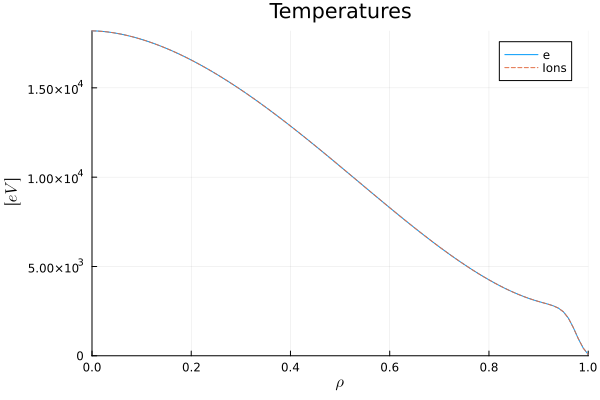

​


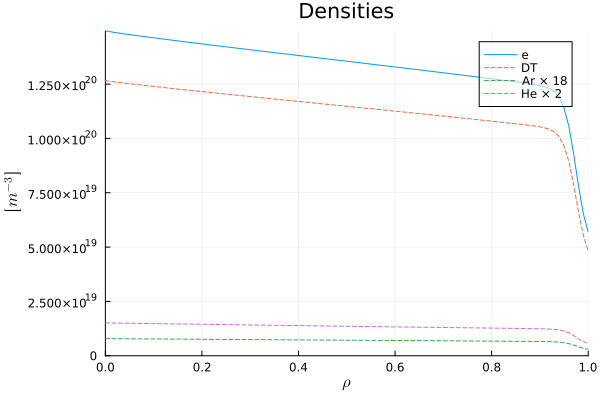

​


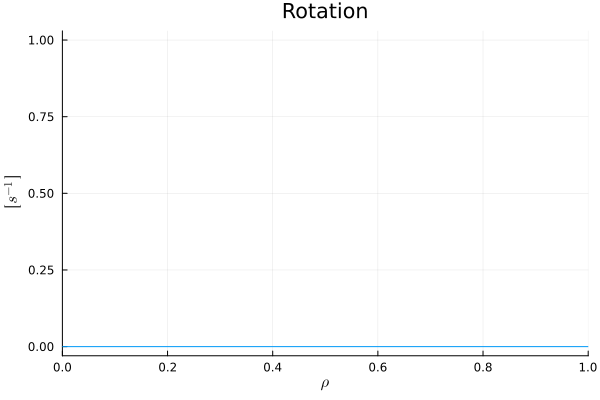

​


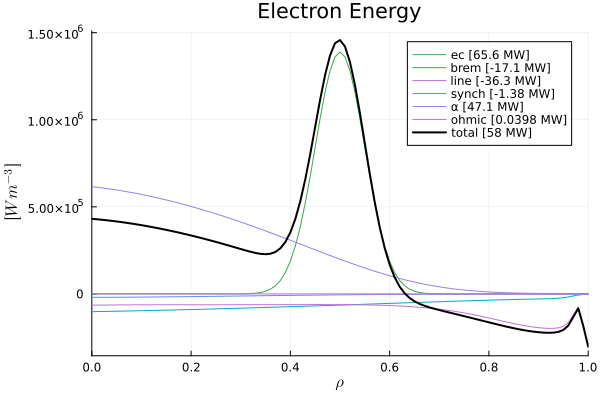

​


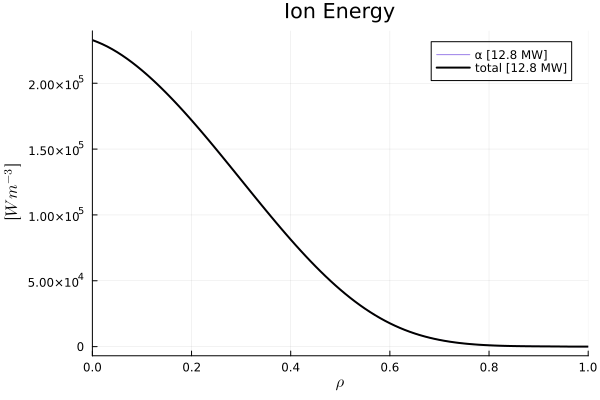

​


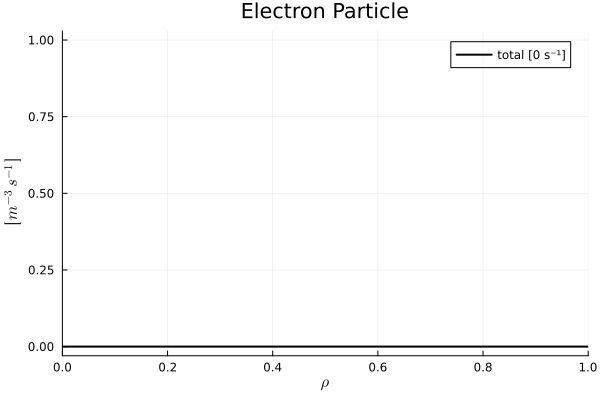

​


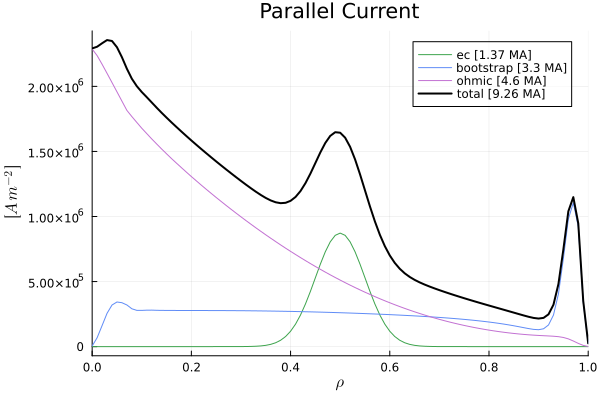

In [52]:
# CHEASE deadstart Miller
dd = IMAS.dd()
ini, act = FUSE.case_parameters(:FPP, version=:v1_demount, init_from=:scalars);
ini.equilibrium.boundary_from = :scalars
act.ActorEquilibrium.model = :CHEASE
act.ActorCHEASE.free_boundary = true

ini.equilibrium.κ = 2.2
ini.equilibrium.ζ = 0.0

dd = FUSE.init(dd, ini, act)
mxh_plot = plot(dd.equilibrium, label="CHEASE deadstart Miller")
display(mxh_plot)

FUSE.digest(dd)